In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [3]:
sms_df= pd.read_csv('spam.csv', encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                names=["label", "message"])

sms_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms_df.info()
print(sms_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
(5572, 2)


In [5]:
sms_df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
sms_df['label'] = sms_df['label'].apply(lambda x: 1 if x == 'spam' else 0)
sms_df['label']=sms_df['label'].astype(int)

In [8]:
sms_df = sms_df.drop_duplicates()
sms_df.shape

(5169, 2)

In [10]:
sms_df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

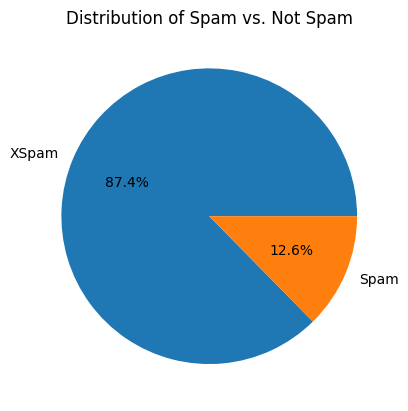

In [11]:
plt.pie(sms_df['label'].value_counts(),labels=['XSpam','Spam'], autopct='%1.1f%%')
plt.title('Distribution of Spam vs. Not Spam')
plt.show()

In [13]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [14]:
sms_df['num_char']=sms_df['message'].apply(len)
sms_df.head()

,label,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
sms_df['num_words']=sms_df['message'].apply(lambda x : len(word_tokenize(x)))
sms_df.head()

,label,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
sms_df['num_sent']=sms_df['message'].apply(lambda x : len(sent_tokenize(x)))
sms_df.head()

,label,message,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
sms_df[['num_char','num_words','num_sent']]

,num_char,num_words,num_sent
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [19]:
sms_df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
sms_df[sms_df['label']==0][['num_char','num_words','num_sent']].describe()      #not spam

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
sms_df[sms_df['label']==1][['num_char','num_words','num_sent']].describe()      # spam

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

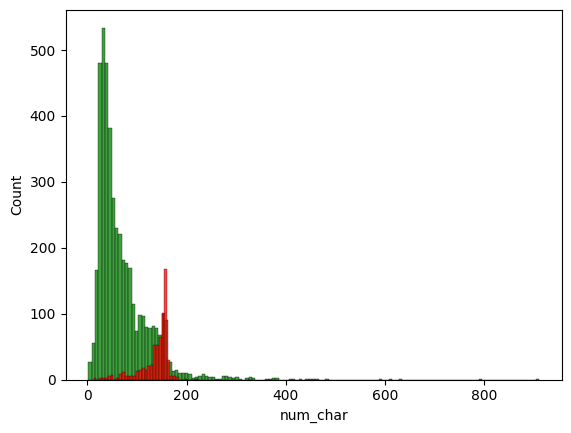

In [23]:
sns.histplot(sms_df[sms_df['label'] == 0]['num_char'], color='green')
sns.histplot(sms_df[sms_df['label'] == 1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

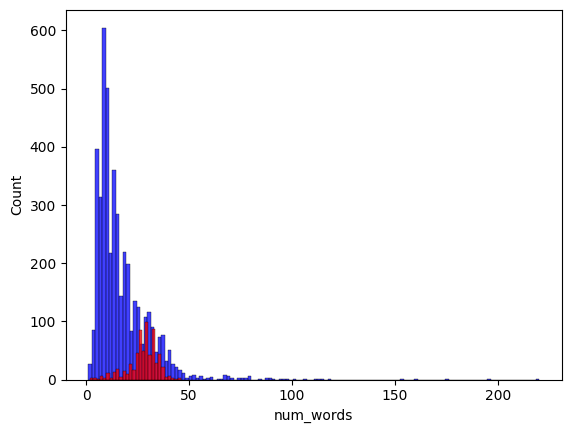

In [24]:
sns.histplot(sms_df[sms_df['label'] == 0]['num_words'], color='blue')
sns.histplot(sms_df[sms_df['label'] == 1]['num_words'], color='red')

In [27]:
import re
from nltk.corpus import stopwords
import string 
punctuation= string.punctuation
nltk.download('punkt')
#!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [29]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def text_transform(x):
  x=x.lower()
  x = nltk.word_tokenize(x)
  x=[word for word in x if (word not in stop_words) and (word.isalnum()) and (word not in punctuation)]
  x = [stemmer.stem(word) for word in x]

  return " ".join(x)


text_transform("HI HOW ARE YOU ? !,  he goes to sleep   ")

'hi goe sleep'

In [32]:
(text_transform(sms_df['message'][0]))

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [31]:
(sms_df['message'][0])


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [33]:
sms_df['text_transformed']=sms_df['message'].apply(text_transform)
sms_df.head()

,label,message,num_char,num_words,num_sent,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(sms_df['text_transformed']).toarray()
# 6708 feature 
X.shape, sms_df['text_transformed'].shape


((5169, 6708), (5169,))

In [40]:
y=sms_df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=50)
lg = LogisticRegression(C=20.0,max_iter=1000)
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)
lg_acc = accuracy_score(y_test, lg_pred)
lg_report = classification_report(y_test, lg_pred)
print("The accuracy of the model is: ", lg_acc)

The accuracy of the model is:  0.9830815709969789
